# Reading the data into python

The data has one file "smoke_dataset.csv".

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import numpy as np
import pandas as pd

smoke=pd.read_csv('smoke_dataset-train.csv')
smoke.head()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
smoke.shape

(159256, 24)

In [4]:
# Removing duplicates:
smoke=smoke.drop_duplicates()
smoke.shape

(159256, 24)

* There is no duplicate values

In [5]:
smoke.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

# Defining the problem statement:
Create a Predictive model which can tell if a person will smoke or not?
* <b>Target Variable</b>: smoking

* <b>Predictors</b>: id,age,height(cm),weight(kg),waist(cm),eyesight(left) ,  eyesight(right) ,  hearing(left) ,  hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein ,  serum creatinine ,  AST,ALT,Gtp ,dental caries

* <b>smoking=0</b>: The person is not smoking

* <b>smoking=1</b>: The person is smoking

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable


<Axes: xlabel='smoking'>

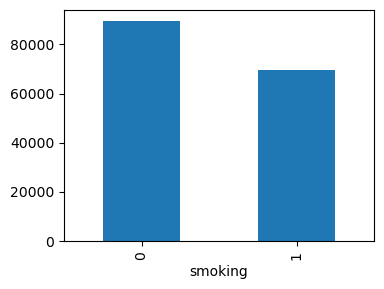

In [6]:
%matplotlib inline
GD=smoke.groupby('smoking').size()
GD.plot(kind='bar',figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration

In [7]:
smoke.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [8]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [9]:
smoke.describe(include='all')

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous


In [11]:
smoke.nunique()

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above,we can now create a simple report of the data, noting down our 
observations regarding each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final.
                                                                     
* smoking: Categorical. Selected. This is the <b>Target Variable!</b>

* id: Qualitative. Rejected.
* age: Continuous. Selected.
* height(cm): Continuous. Selected.
* weight(kg): Continuous. Selected.
* waist(cm): Continuous. Selected.
* eyesight(left): Categorical. Selected.
* eyesight(right): Categorical. Selected.
* hearing(left): Categorical. Selected.
* hearing(right): Categorical. Selected.
* systolic: Continuous. Selected.
* relaxation: Continuous. Selected.
* fasting blood sugar: Continuous. Selected.
* Cholesterol: Continuous. Selected.
* triglyceride: Continuous. Selected.
* HDL: Continuous. Selected.
* LDL: Continuous. Selected.
* hemoglobin: Continuous. Selected.
* Urine protein: Categorical. Selected.
* serum creatinine: Continuous. Selected.
* AST: Continuous. Selected.
* ALT: Continuous. Selected.
* Gtp: Continuous. Selected.
* dental caries: Categorical. Selected.


# Removing useless columns from the data

In [12]:
# Deleting the columns which are not useful for predictions
uselessColumns=['id']
smoke=smoke.drop(uselessColumns,axis=1)


In [13]:
smoke.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
5,50,170,55,51.0,1.2,1.2,1,1,146,95,...,31,99,15.9,1,0.7,24,42,119,1,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0
7,55,155,60,84.5,0.7,0.9,1,1,137,91,...,51,198,14.5,1,0.7,16,15,16,0,0
8,40,165,70,89.0,0.7,1.0,1,1,130,80,...,59,150,15.7,1,0.9,24,21,31,0,1
9,40,155,50,73.0,1.5,1.5,1,1,105,70,...,55,122,13.2,1,0.7,22,16,14,0,0


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
Based on the Basic Data Exploration above, we have spotted 6 categorical predictors in the data

Categorical Predictors: hearing(left),hearing(right),Urine protein,dental caries, eyesight(left), eyesight(right)

We use bar charts to see how the data is distributed for these categorical columns

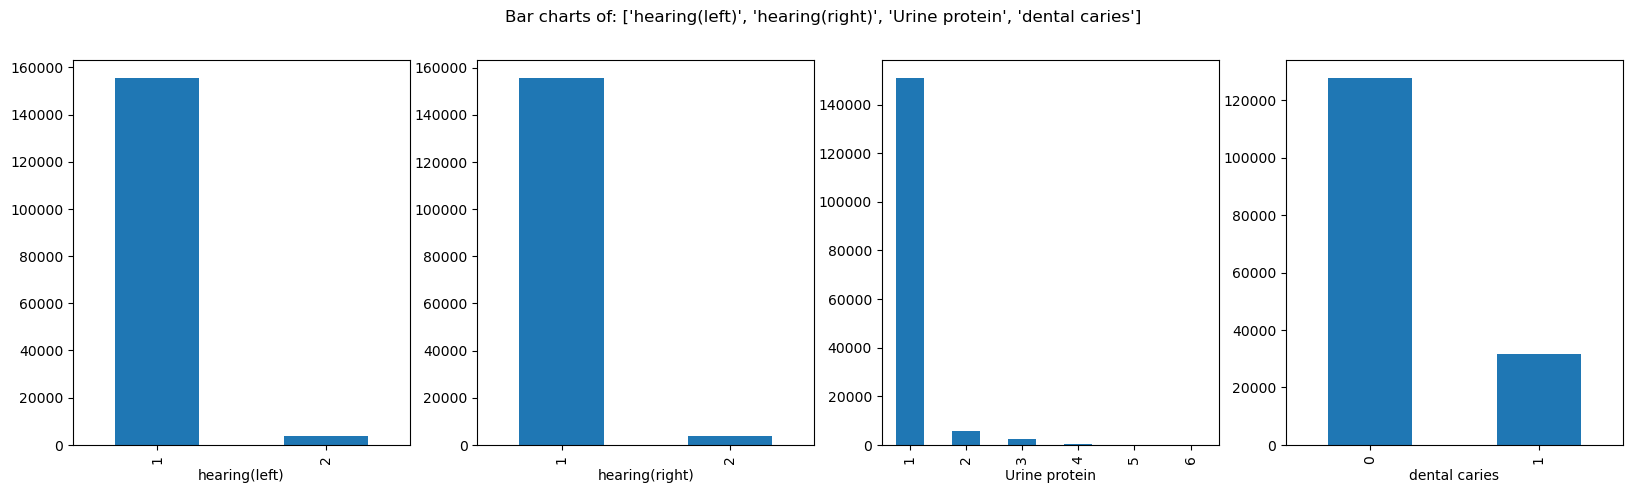

In [14]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=smoke, colsToPlot=['hearing(left)','hearing(right)','Urine protein','dental caries'])

In [15]:
smoke['Urine protein'][smoke['Urine protein']>=3]=2

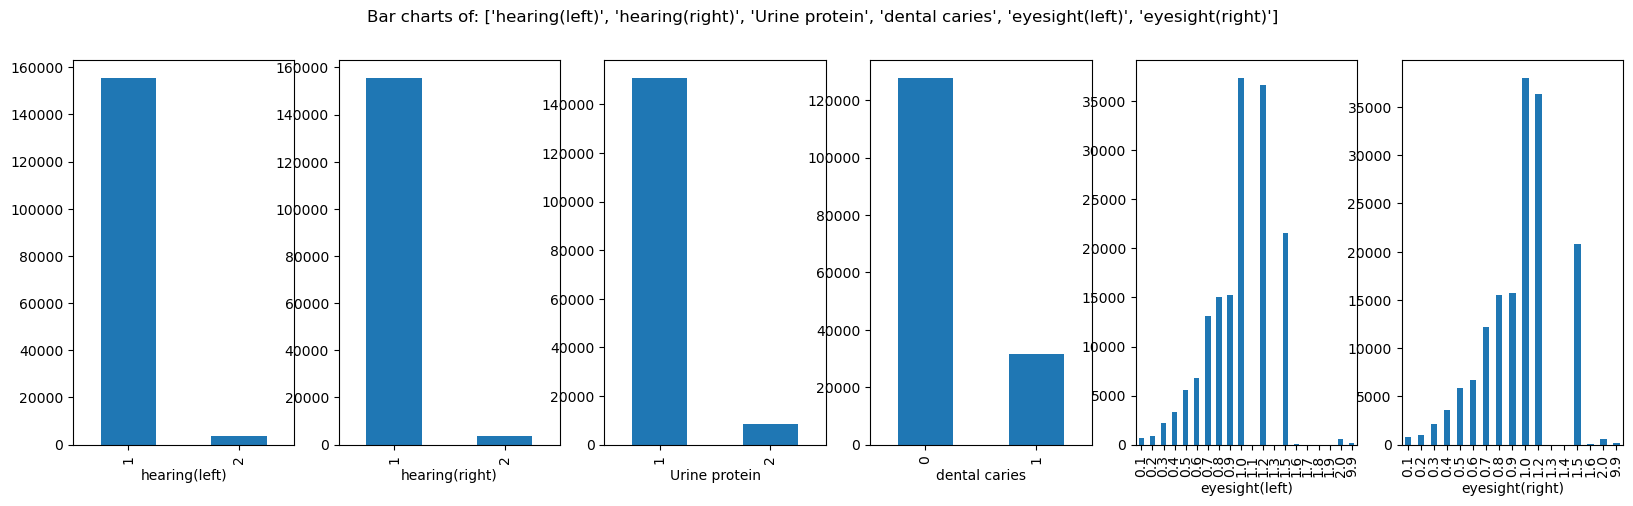

In [16]:
PlotBarCharts(inpData=smoke, colsToPlot=['hearing(left)','hearing(right)','Urine protein','dental caries', 'eyesight(left)', 'eyesight(right)'])

For now, all these categorical columns are selected. Later, the columns will be selected based on correlation

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are <b>16</b> continuous predictor variables 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height(cm)'}>],
       [<Axes: title={'center': 'weight(kg)'}>,
        <Axes: title={'center': 'waist(cm)'}>]], dtype=object)

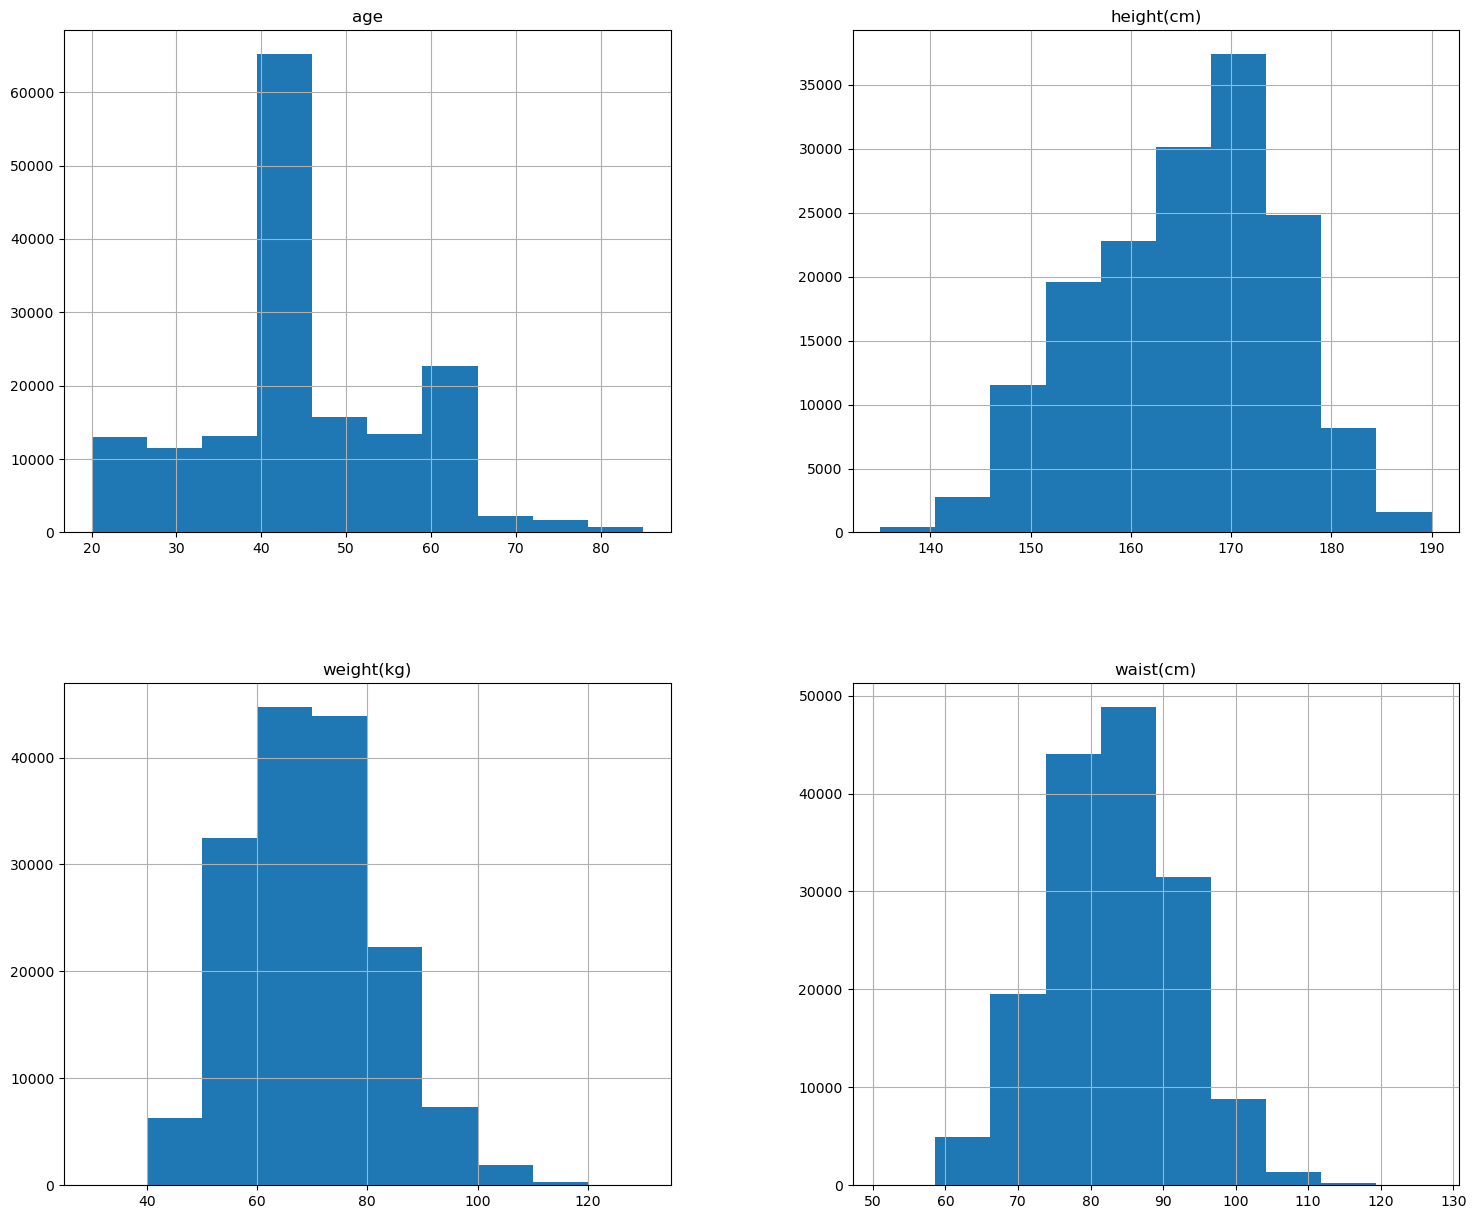

In [17]:
# Plotting histograms of multiple columns together
# Observe that Fare has outliers
# First part
smoke.hist(['age', 'height(cm)', 'weight(kg)', 'waist(cm)'], figsize=(18,15))




array([[<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'relaxation'}>],
       [<Axes: title={'center': 'fasting blood sugar'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'triglyceride'}>,
        <Axes: title={'center': 'HDL'}>]], dtype=object)

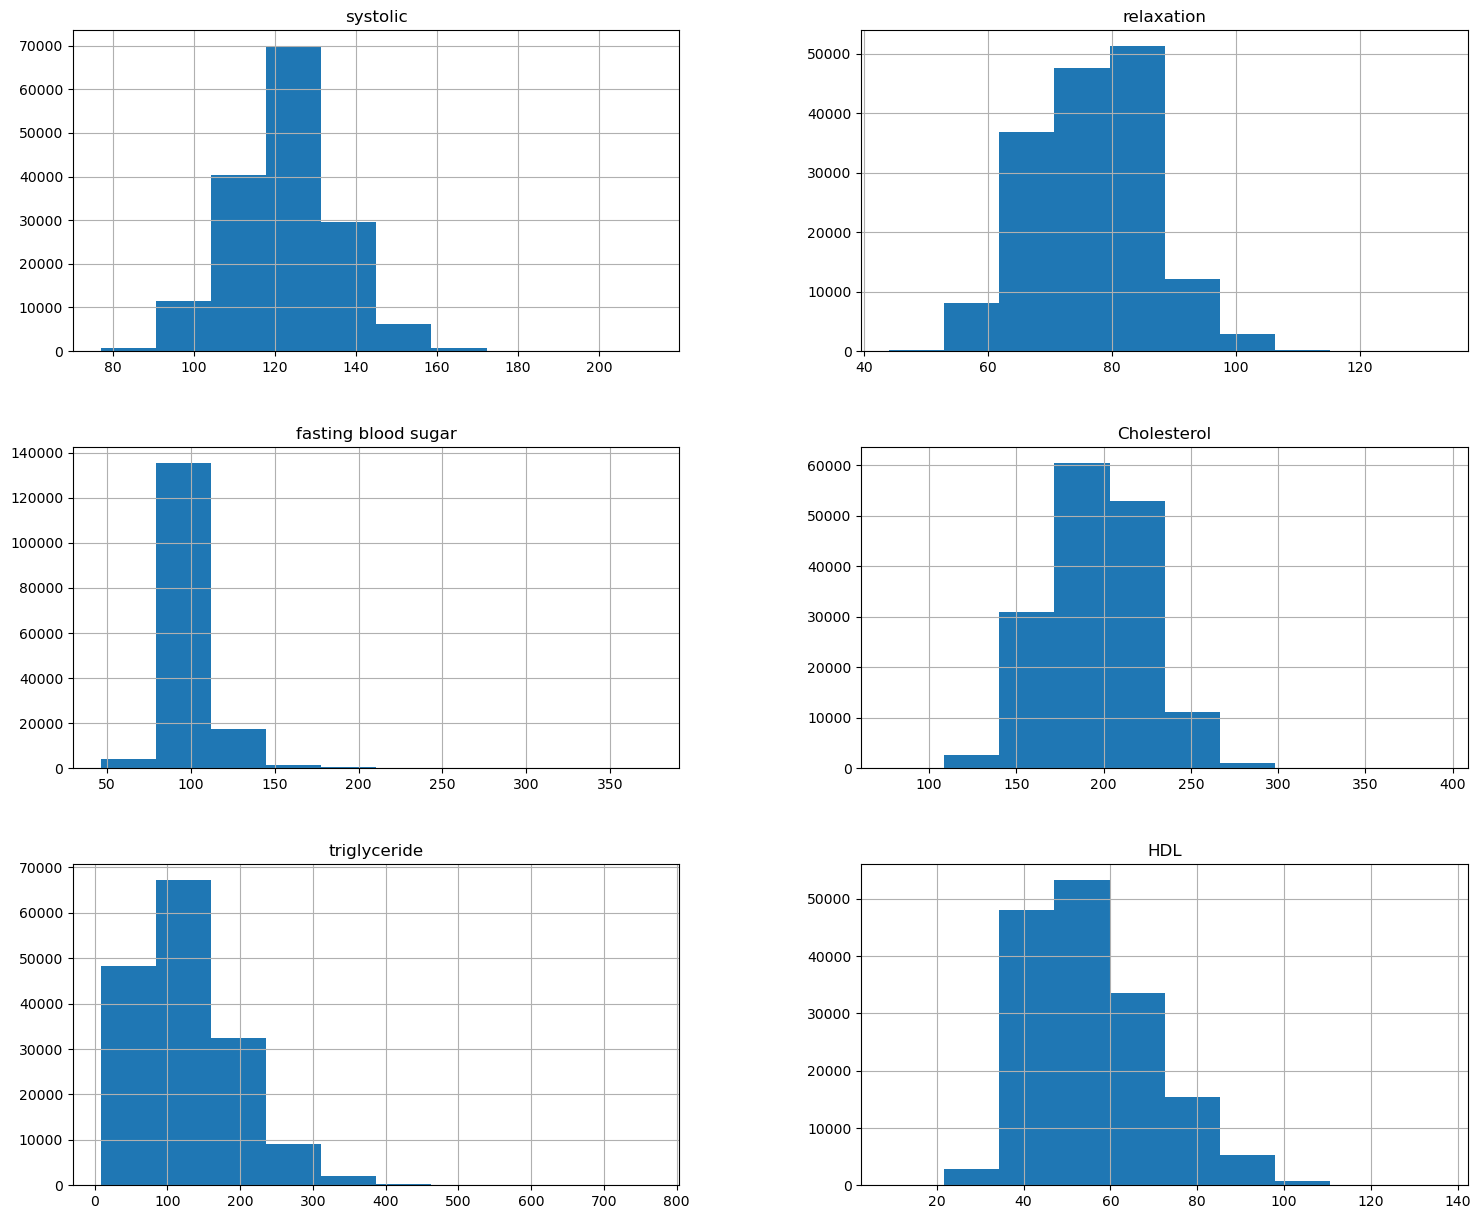

In [18]:
# Second part
smoke.hist(['systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL'], figsize=(18,15))




array([[<Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'hemoglobin'}>],
       [<Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'AST'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'Gtp'}>]],
      dtype=object)

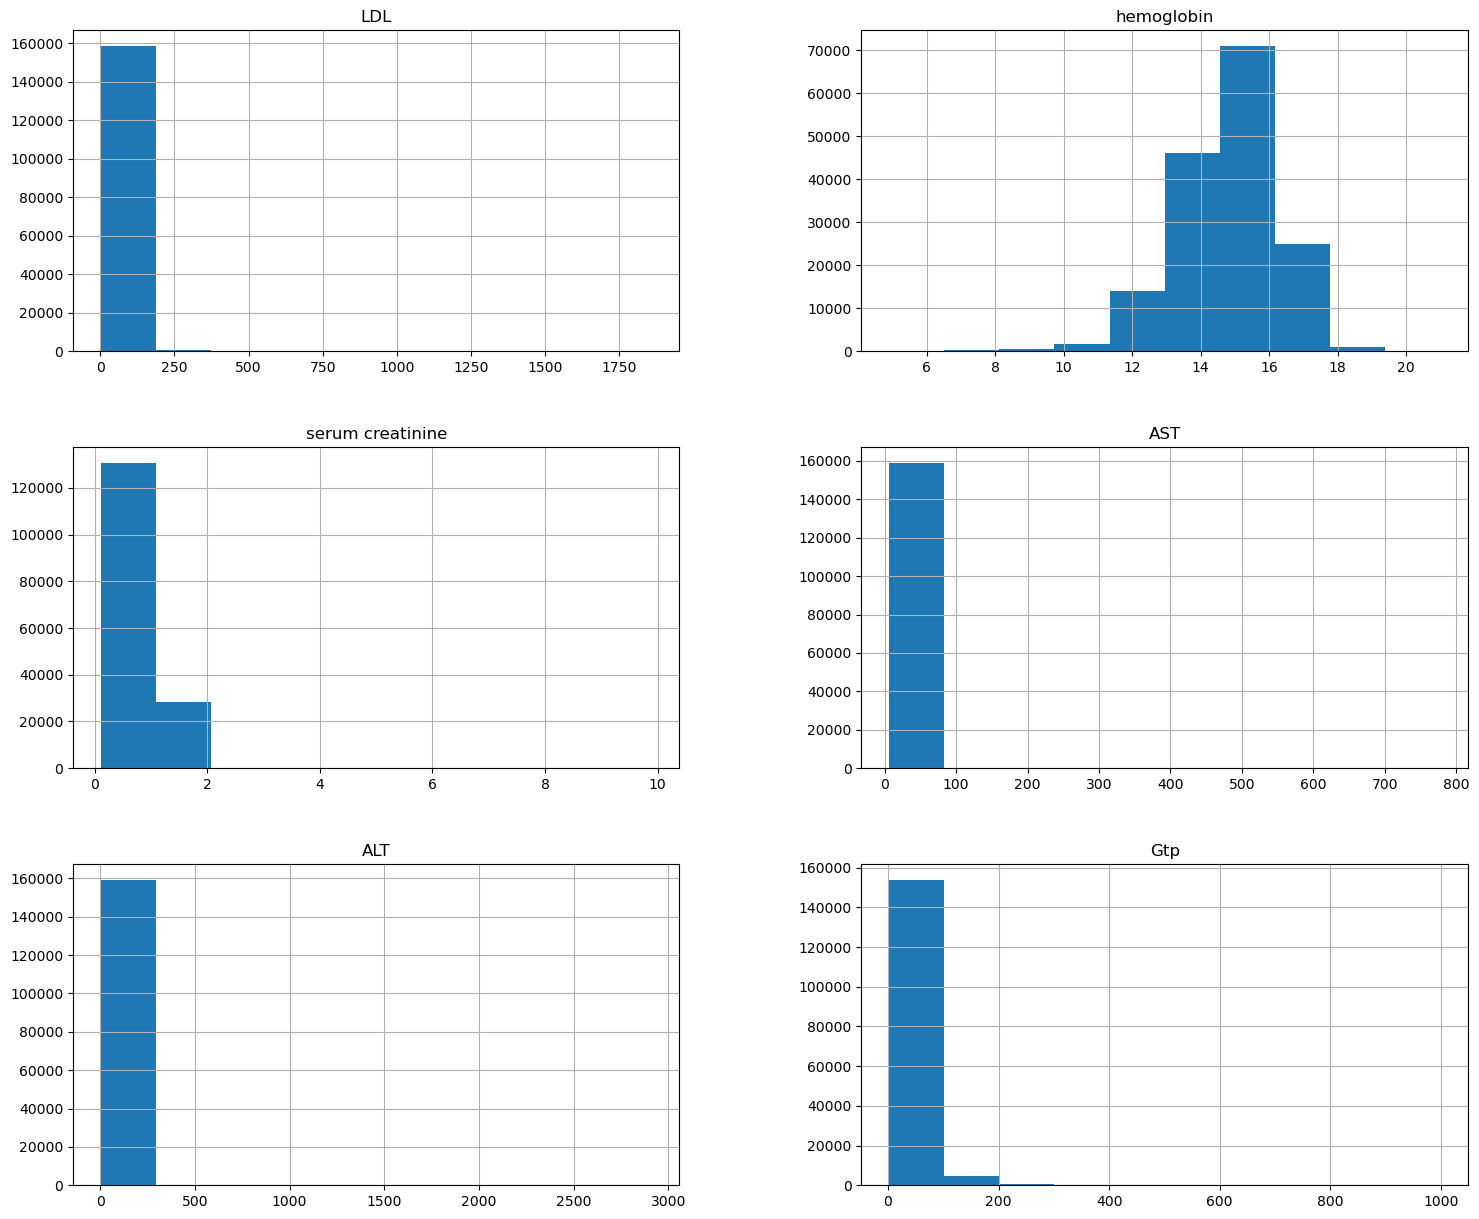

In [19]:
# Third part
smoke.hist(['LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'], figsize=(18,15))

# Outlier treatment

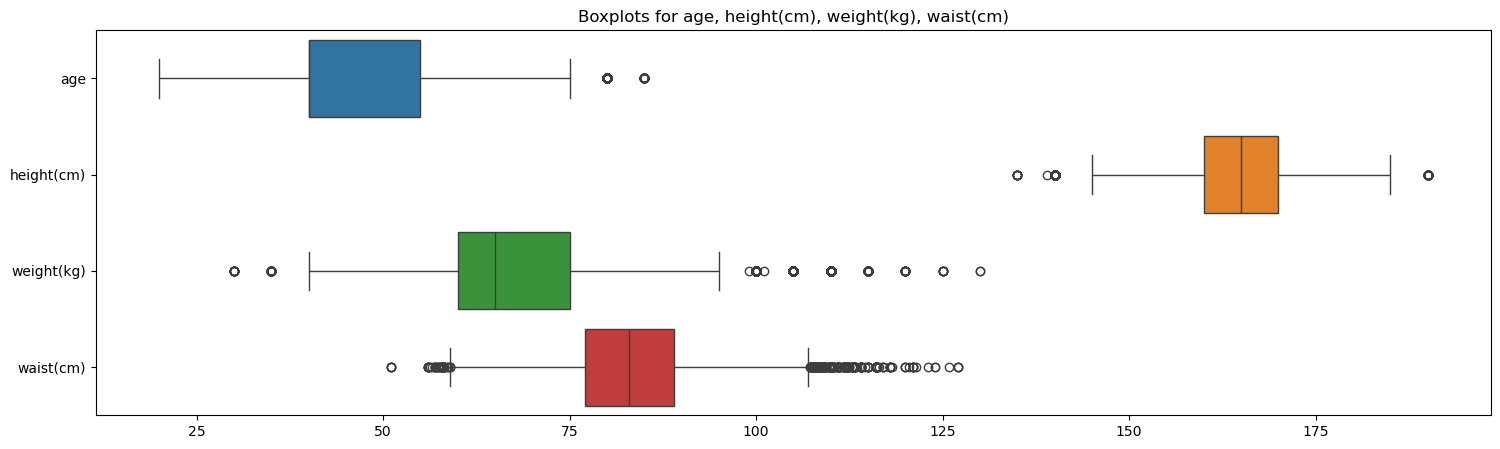

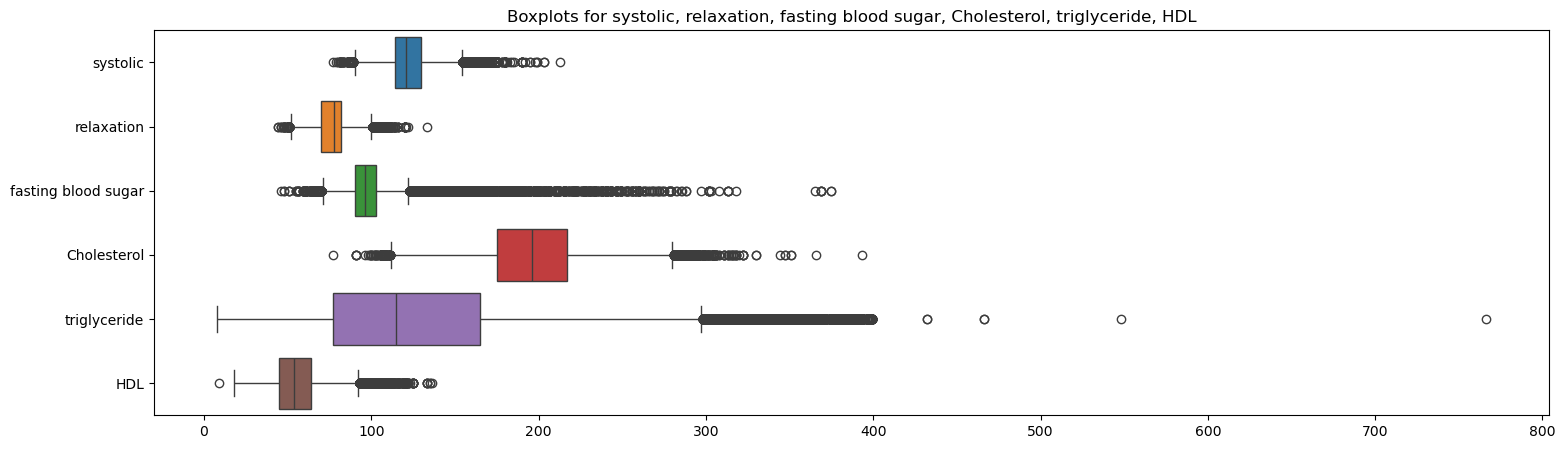

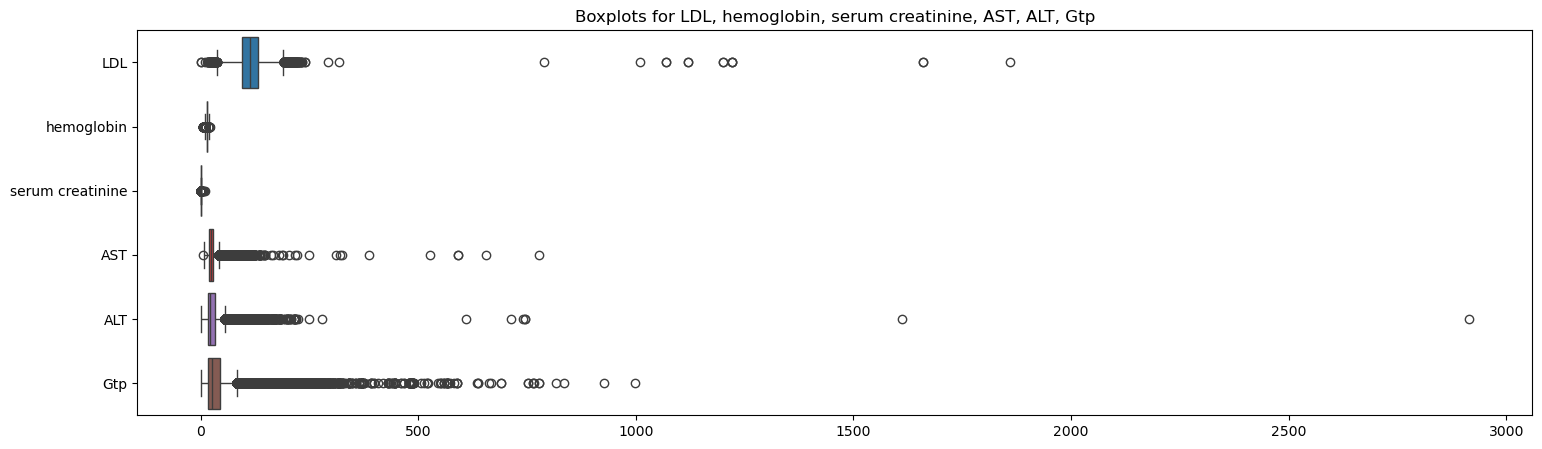

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for each group and check for outliers
columns_group1 = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)']
columns_group2 = ['systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL']
columns_group3 = ['LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']

# Function to plot box plots for each group
def plot_boxplots(df, columns_group):
    plt.figure(figsize=(18, 5))
    sns.boxplot(data=df[columns_group], orient='h')
    plt.title(f"Boxplots for {', '.join(columns_group)}")
    plt.show()

# Group 1
plot_boxplots(smoke, columns_group1)

# Group 2
plot_boxplots(smoke, columns_group2)

# Group 3
plot_boxplots(smoke, columns_group3)


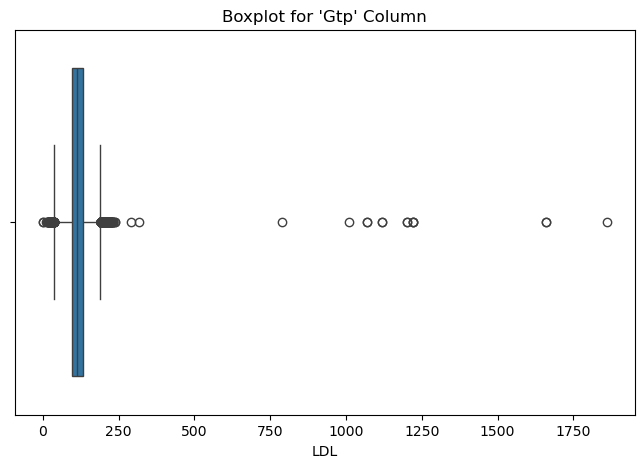

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plot for 'Gtp' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=smoke, x='LDL')
plt.title("Boxplot for 'Gtp' Column")
plt.show()


In [22]:
import matplotlib.pyplot as plt

# Define the outlier detection function based on IQR
def detect_outliers(df, column):
    # Ensure the column is numeric and drop any NaN values
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df.dropna(subset=[column])

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Plot histograms and check for outliers in each part
columns_group1 = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)']
columns_group2 = ['systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL']
columns_group3 = ['LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']



In [23]:
# Function to plot histograms for each group and check for outliers
def plot_and_check_outliers(df, columns_group):
    df[columns_group].hist(figsize=(18, 5))
    plt.show()
    
    # Check for outliers in each column
    for column in columns_group:
        outliers = detect_outliers(df, column)
        if not outliers.empty:
            print(f"Outliers detected in '{column}':")
            # print(outliers)
        else:
            print(f"No outliers detected in '{column}'")




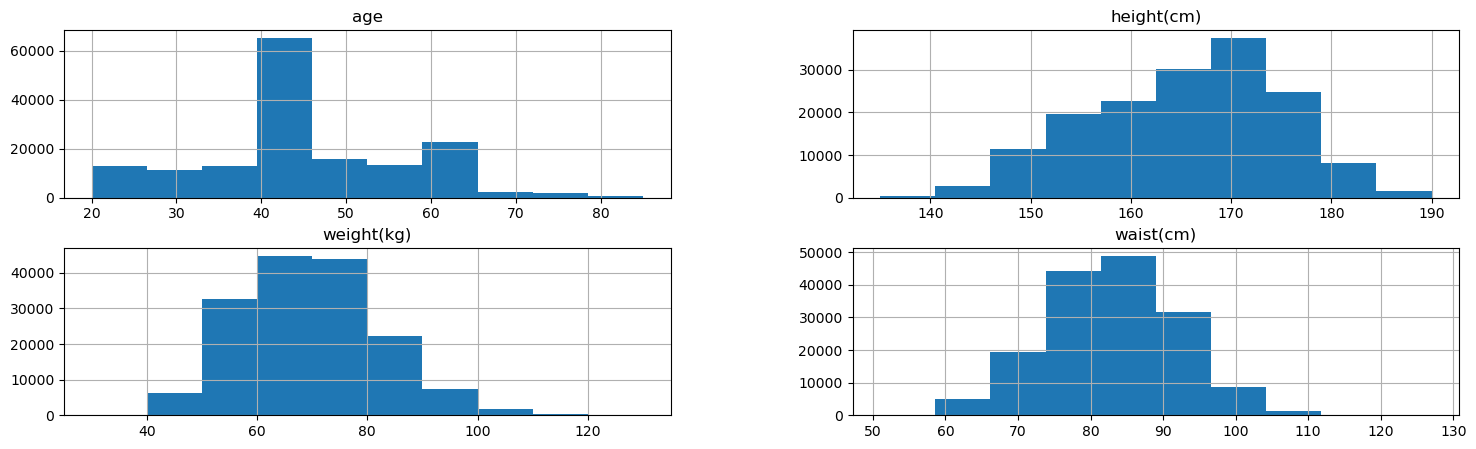

Outliers detected in 'age':
Outliers detected in 'height(cm)':
Outliers detected in 'weight(kg)':
Outliers detected in 'waist(cm)':


In [24]:
# Group 1
plot_and_check_outliers(smoke, columns_group1)



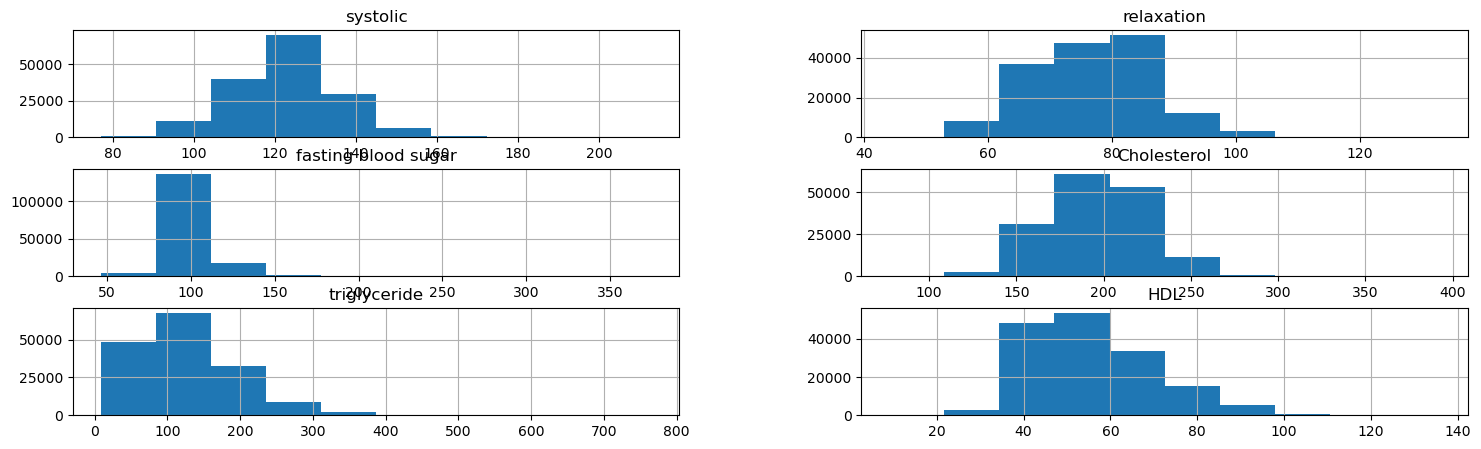

Outliers detected in 'systolic':
Outliers detected in 'relaxation':
Outliers detected in 'fasting blood sugar':
Outliers detected in 'Cholesterol':
Outliers detected in 'triglyceride':
Outliers detected in 'HDL':


In [25]:
# Group 2
plot_and_check_outliers(smoke, columns_group2)


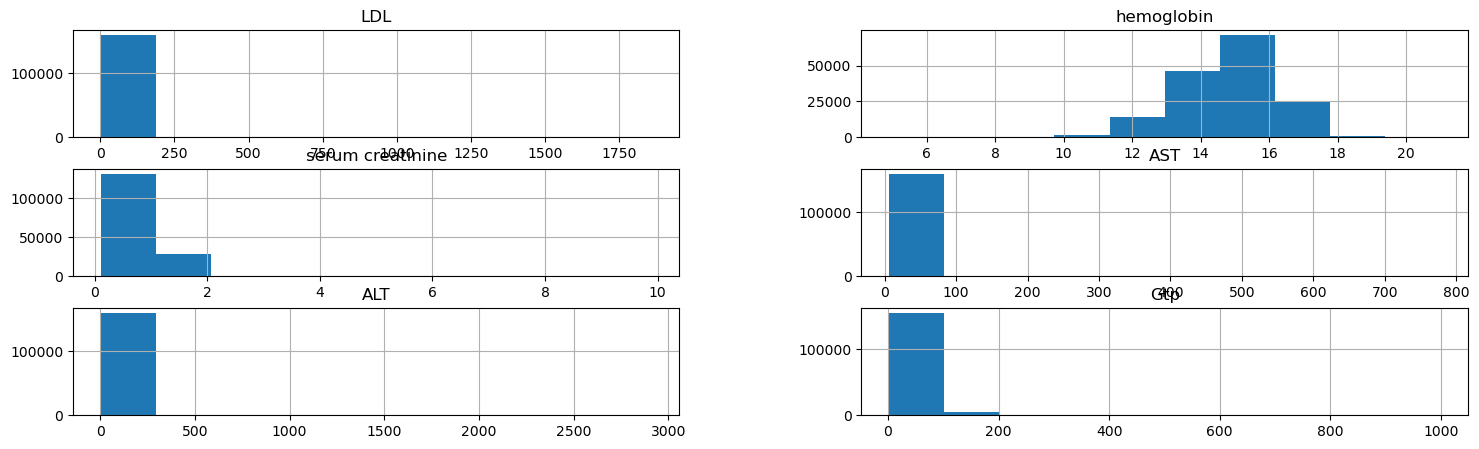

Outliers detected in 'LDL':
Outliers detected in 'hemoglobin':
Outliers detected in 'serum creatinine':
Outliers detected in 'AST':
Outliers detected in 'ALT':
Outliers detected in 'Gtp':


In [26]:

# Group 3
plot_and_check_outliers(smoke, columns_group3)

In [27]:

# Define a function to remove outliers based on IQR for all columns
def remove_outliers_all_columns(df, columns):
    # Create a copy of the dataframe to avoid modifying the original one
    df_cleaned = df.copy()
    
    # Iterate over each column to remove outliers
    for column in columns:
        # Ensure the column is numeric and drop any NaN values
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
        df_cleaned = df_cleaned.dropna(subset=[column])
        
        # Calculate Q1, Q3, and IQR
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the dataframe
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# List of continuous columns in the dataset
continuous_columns = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
    'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
    'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]

# Remove outliers from all continuous columns
smoke_clean = remove_outliers_all_columns(smoke, continuous_columns)

# Output the shape of the data before and after removing outliers
print(f"Original data shape: {smoke.shape}")
print(f"Data shape after removing outliers: {smoke_clean.shape}")


Original data shape: (159256, 23)
Data shape after removing outliers: (118083, 23)


# Missing values treatment

In [28]:
# Finding how many missing values are there for each column
smoke_clean.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots

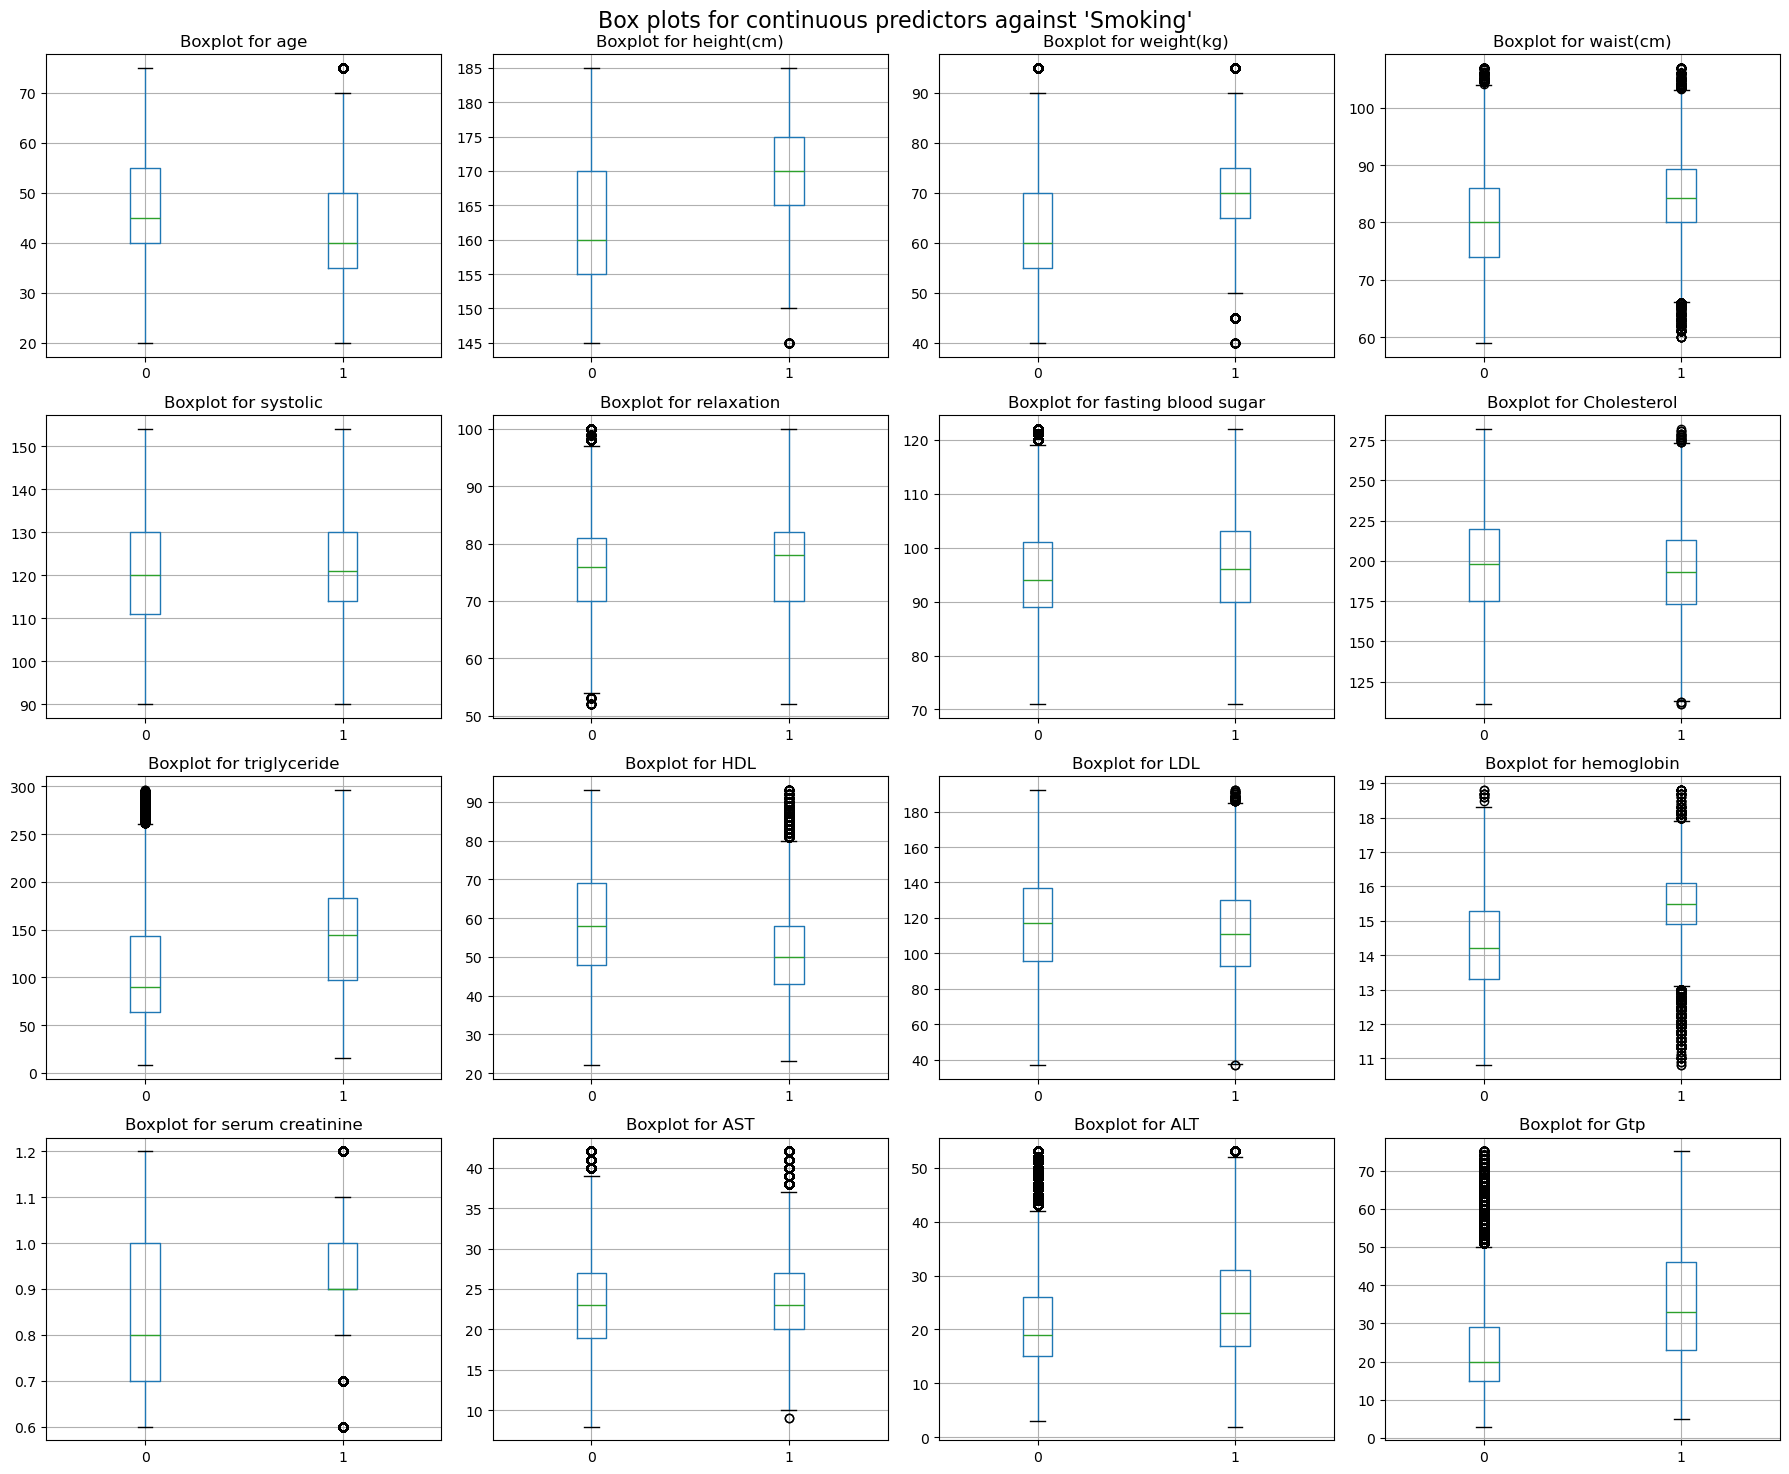

In [29]:
import matplotlib.pyplot as plt

# List of continuous columns
continuous_columns = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
    'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]

# Calculate the number of rows and columns needed for the subplots
nrows = 4
ncols = 4  # 16 columns and 4 rows means we need 4 columns per row

# Create subplots for each continuous predictor
fig, PlotCanvas = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 15))

# Flatten the axes array to make iteration easier
PlotCanvas = PlotCanvas.flatten()

# Create box plots for each continuous predictor against the Target Variable "smoking"
for i, PredictorCol in enumerate(continuous_columns):
    smoke_clean.boxplot(column=PredictorCol, by='smoking', figsize=(5, 5), vert=True, ax=PlotCanvas[i])
    PlotCanvas[i].set_title(f"Boxplot for {PredictorCol}")
    PlotCanvas[i].set_xlabel('')
    PlotCanvas[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.suptitle("Box plots for continuous predictors against 'Smoking'", fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust title position
plt.show()


# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.


We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [30]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        # Grouping data by the TargetVariable and applying the list function
        CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
        
        # Applying the one-way ANOVA test
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is < 0.05, that means we reject the null hypothesis (H0)
        if AnovaResults[1] < 0.05:
            print(f"{predictor} is correlated with {TargetVariable} | P-Value: {AnovaResults[1]}")
            SelectedPredictors.append(predictor)
        else:
            print(f"{predictor} is NOT correlated with {TargetVariable} | P-Value: {AnovaResults[1]}")
    
    return SelectedPredictors


# Calling the function to check which continuous variables are correlated with the 'smoking' target
continuous_columns = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
    'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]

# Ensure 'smoking' is the correct categorical target variable name
SelectedPredictors = FunctionAnova(inpData=smoke_clean, TargetVariable='smoking', ContinuousPredictorList=continuous_columns)

# Output the selected predictors
print("\nSelected Predictors:", SelectedPredictors)


##### ANOVA Results ##### 

age is correlated with smoking | P-Value: 0.0
height(cm) is correlated with smoking | P-Value: 0.0
weight(kg) is correlated with smoking | P-Value: 0.0
waist(cm) is correlated with smoking | P-Value: 0.0
systolic is correlated with smoking | P-Value: 1.1128463498054604e-56
relaxation is correlated with smoking | P-Value: 2.939548431247908e-210
fasting blood sugar is correlated with smoking | P-Value: 2.3080349156313241e-209
Cholesterol is correlated with smoking | P-Value: 7.797976285053985e-195
triglyceride is correlated with smoking | P-Value: 0.0
HDL is correlated with smoking | P-Value: 0.0
LDL is correlated with smoking | P-Value: 7.156060795052857e-242
hemoglobin is correlated with smoking | P-Value: 0.0
serum creatinine is correlated with smoking | P-Value: 0.0
AST is correlated with smoking | P-Value: 0.00045882208333759047
ALT is correlated with smoking | P-Value: 0.0
Gtp is correlated with smoking | P-Value: 0.0

Selected Predictors: ['age', 'heigh

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

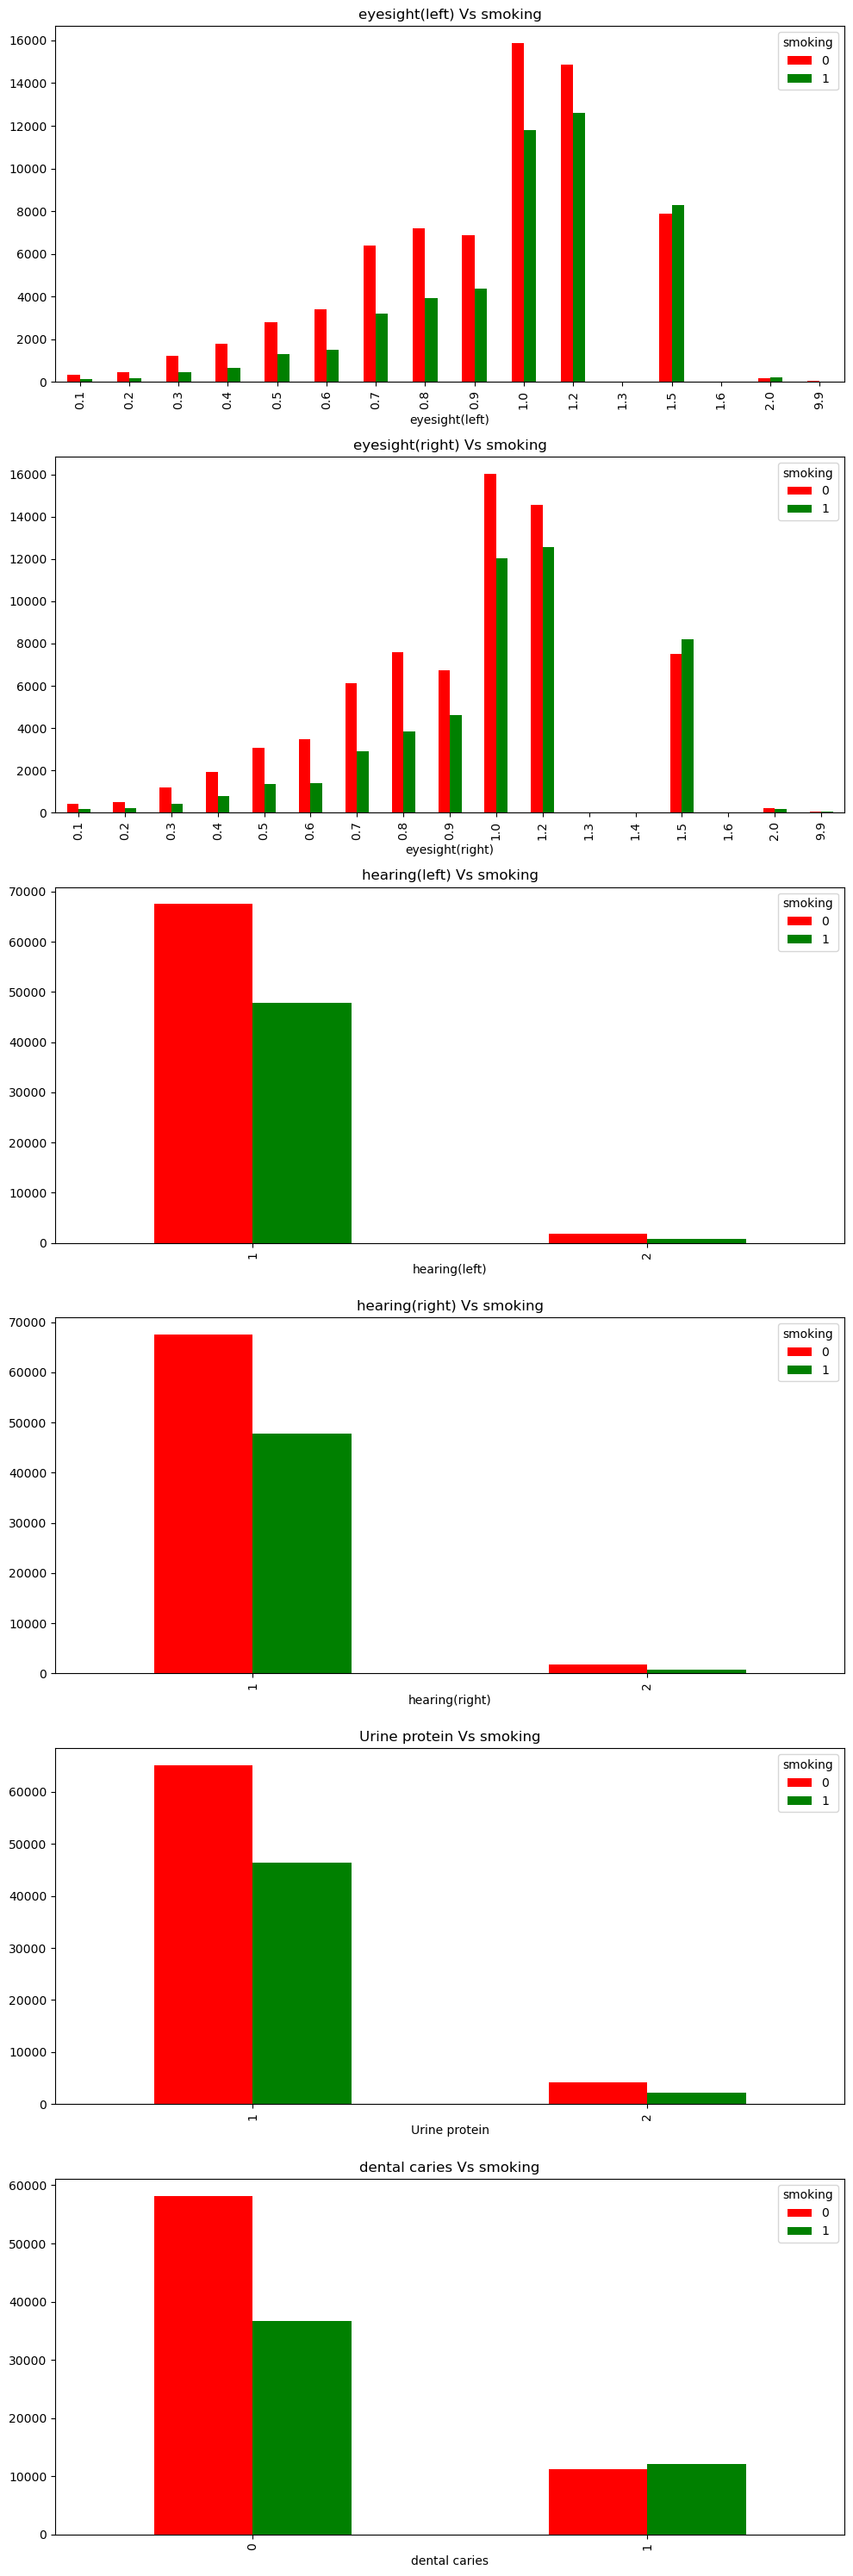

In [31]:
# Categorical columns in your smoke_clean dataset
CategoricalColsList = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10, 30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "smoking"
for CategoricalCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult = pd.crosstab(index=smoke_clean[CategoricalCol], columns=smoke_clean['smoking'])
    CrossTabResult.plot.bar(color=['red', 'green'], ax=PlotCanvas[i], title=CategoricalCol + ' Vs ' + 'smoking')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [32]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    import pandas as pd

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        # Creating a contingency table between the target variable and each categorical predictor
        CrossTabResult = pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        
        # Running the Chi-Square test
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the Chi-Square P-Value is <0.05, that means we reject H0 (independence) and conclude correlation
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return SelectedPredictors


# Defining the list of categorical variables
CategoricalColumns = [
    'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 
    'Urine protein', 'dental caries'
]

# Calling the function with 'smoking' as the target variable and the categorical variables
selected_columns = FunctionChisq(inpData=smoke_clean, TargetVariable='smoking', CategoricalVariablesList=CategoricalColumns)

# Output the selected variables after the Chi-Square test
print("Selected Categorical Predictors: ", selected_columns)


eyesight(left) is correlated with smoking | P-Value: 0.0
eyesight(right) is correlated with smoking | P-Value: 0.0
hearing(left) is correlated with smoking | P-Value: 4.736662502993481e-28
hearing(right) is correlated with smoking | P-Value: 4.253301286670864e-28
Urine protein is correlated with smoking | P-Value: 2.53043692591483e-28
dental caries is correlated with smoking | P-Value: 3.8661208737876445e-300
Selected Categorical Predictors:  ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']


# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [33]:
# Final selected columns based on correlation analysis (Categorical and Continuous variables)
SelectedColumns = [
    'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 
    'Urine protein', 'dental caries', 'age', 'height(cm)', 'weight(kg)', 
    'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 
    'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp'
]

# Selecting the final columns from the smoke_clean DataFrame
DataForML = smoke_clean[SelectedColumns]

# Display the first few rows of the DataForML DataFrame
DataForML.head()


,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,age,height(cm),weight(kg),waist(cm),...,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,ALT,Gtp
2,0.4,0.5,1,1,1,0,20,170,75,81.0,...,75,79,178,197,45,93,17.4,0.8,31,53
3,1.5,1.2,1,1,1,1,35,180,95,105.0,...,88,91,180,203,38,102,15.9,1.0,27,30
4,1.5,1.0,1,1,1,0,30,165,60,80.5,...,76,91,155,87,44,93,15.4,0.8,13,17
6,1.5,1.2,1,1,1,0,45,160,55,69.0,...,88,84,222,153,69,122,13.0,0.7,12,16
8,0.7,1.0,1,1,1,0,40,165,70,89.0,...,80,104,243,163,59,150,15.7,0.9,21,31


In [34]:
# Saving this final data for reference during deployment
DataForML.to_pickle('Smoke_DataForML.pkl')

In [35]:
# Machine Learning: Splitting the data into Training and Testing sample

In [36]:
# Adding the target variable 'smoking' to DataForML
DataForML['smoking'] = smoke_clean['smoking']

In [37]:
DataForML

,eyesight(left),eyesight(right),hearing(left),hearing(right),Urine protein,dental caries,age,height(cm),weight(kg),waist(cm),...,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,ALT,Gtp,smoking
2,0.4,0.5,1,1,1,0,20,170,75,81.0,...,79,178,197,45,93,17.4,0.8,31,53,1
3,1.5,1.2,1,1,1,1,35,180,95,105.0,...,91,180,203,38,102,15.9,1.0,27,30,0
4,1.5,1.0,1,1,1,0,30,165,60,80.5,...,91,155,87,44,93,15.4,0.8,13,17,1
6,1.5,1.2,1,1,1,0,45,160,55,69.0,...,84,222,153,69,122,13.0,0.7,12,16,0
8,0.7,1.0,1,1,1,0,40,165,70,89.0,...,104,243,163,59,150,15.7,0.9,21,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159250,1.5,1.2,1,1,1,1,25,180,90,88.0,...,96,206,199,43,123,15.3,1.1,29,42,0
159252,1.0,1.0,1,1,1,0,50,155,75,82.0,...,89,213,202,64,108,14.5,0.6,20,18,0
159253,1.5,1.0,1,1,1,0,40,160,50,66.0,...,84,189,45,87,93,10.9,0.6,9,12,0
159254,1.2,1.0,1,1,1,0,50,165,75,92.0,...,122,165,148,55,80,14.4,1.1,17,37,1


In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='smoking'
Predictors=[
    'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 
    'Urine protein', 'dental caries', 'age', 'height(cm)', 'weight(kg)', 
    'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 
    'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'ALT', 'Gtp'
]



X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
# l1= Lasso, l2= ridge
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     20873
           1       0.69      0.71      0.70     14552

    accuracy                           0.75     35425
   macro avg       0.74      0.74      0.74     35425
weighted avg       0.75      0.75      0.75     35425

[[16280  4593]
 [ 4291 10261]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.74759152 0.7459009  0.75024469 0.74489873 0.74819675 0.74724301
 0.74539844 0.75899905 0.7627681  0.74782292]

Final Average Accuracy of the model: 0.75


              precision    recall  f1-score   support

           0       0.79      0.78      0.79     20873
           1       0.69      0.71      0.70     14552

    accuracy                           0.75     35425
   macro avg       0.74      0.74      0.74     35425
weighted avg       0.75      0.75      0.75     35425

[[16280  4593]
 [ 4291 10261]]


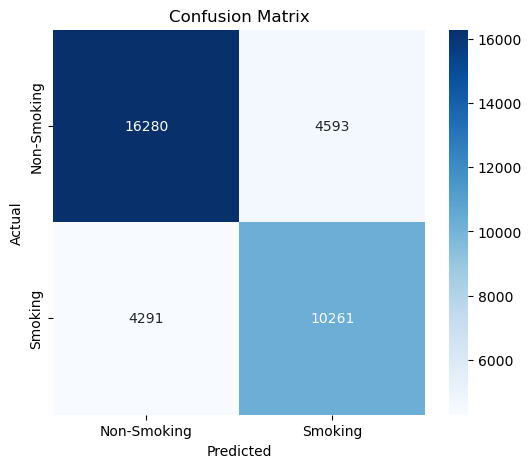

Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.74759152 0.7459009  0.75024469 0.74489873 0.74819675 0.74724301
 0.74539844 0.75899905 0.7627681  0.74782292]

Final Average Accuracy of the model: 0.75


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Choose parameter Penalty='l1' or C=1
# Choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG = clf.fit(X_train, y_train)
prediction = LOG.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, prediction)

# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoking', 'Smoking'], yticklabels=['Non-Smoking', 'Smoking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# Decision Trees

DecisionTreeClassifier(max_depth=6)
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     20873
           1       0.67      0.77      0.72     14552

    accuracy                           0.75     35425
   macro avg       0.75      0.75      0.75     35425
weighted avg       0.76      0.75      0.75     35425

[[15347  5526]
 [ 3305 11247]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.75793106 0.75453152 0.75823163 0.74736793 0.74991136 0.75145721
 0.75464052 0.7582135  0.76008445 0.74375524]

Final Average Accuracy of the model: 0.75


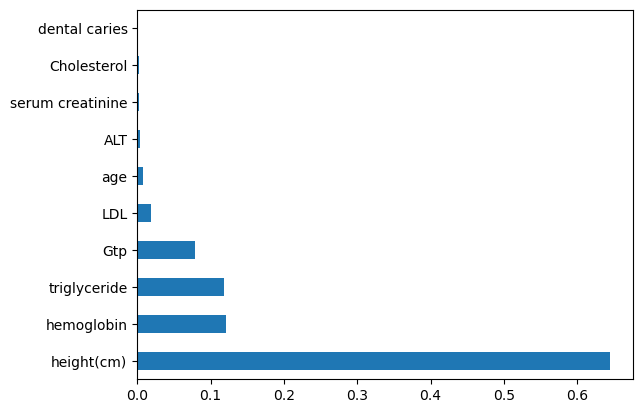

In [41]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest


RandomForestClassifier(max_depth=6, random_state=42)
              precision    recall  f1-score   support

           0       0.84      0.72      0.78     20873
           1       0.67      0.80      0.73     14552

    accuracy                           0.76     35425
   macro avg       0.75      0.76      0.75     35425
weighted avg       0.77      0.76      0.76     35425

[[15102  5771]
 [ 2895 11657]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75808183 0.75371097 0.76310794 0.75360706 0.76037405 0.75830294
 0.75570023 0.76568525 0.7664558  0.7485731 ]

Final Average Accuracy of the model: 0.76


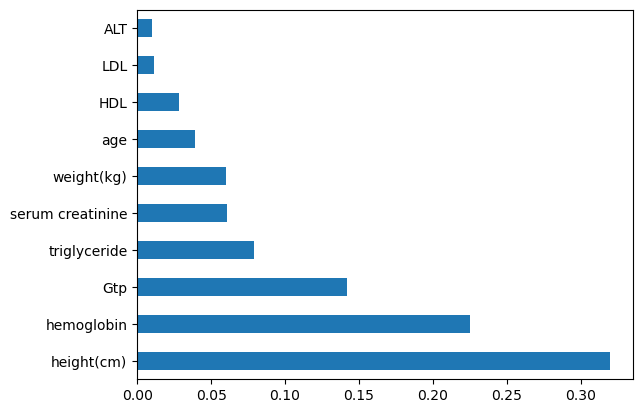

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini', random_state=42)

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF = clf.fit(X_train, y_train)
prediction = RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


In [44]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:35
   ---------------------------------------- 0.7/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.1/124.9 MB 5.1 MB/s eta 0:00:25
   ---------------------------------------- 1.3/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 1.6/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 2.2/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 3.0/124.9 MB 7.7 MB/s eta 0:00:16
   - -------------------------------------- 3.8/124.9 MB 8.7 MB/s eta 0:00:14
   - -------------------------------------- 4.6/124.9 MB 9.5 MB/s eta 0:00:13
   - -------------------------------------- 5.4/124.9 MB 10.1 MB/s eta 0:00:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     20873
           1       0.70      0.79      0.74     14552

    accuracy                           0.77     35425
   macro avg       0.77   

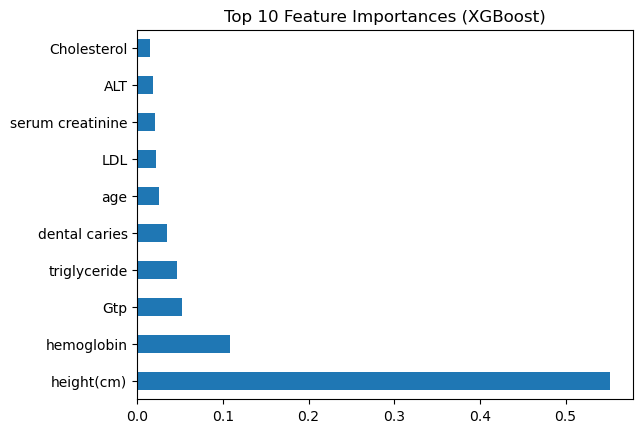

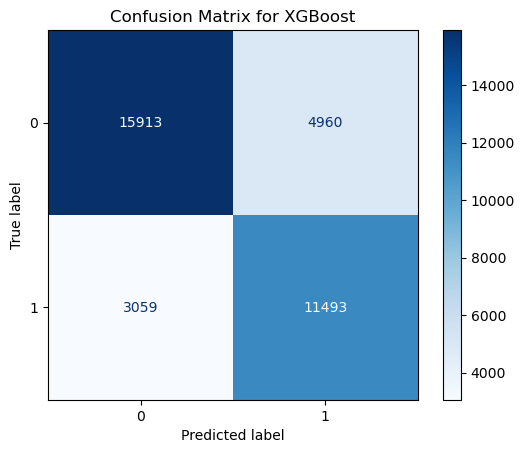


Accuracy values for 10-fold Cross Validation:
 [0.78226288 0.77312065 0.78330576 0.77511553 0.78293701 0.77694341
 0.77443557 0.7833964  0.78930818 0.77377447]

Final Average Accuracy of the model: 0.78


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the XGBoost model
clf = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB = clf.fit(X_train, y_train)
prediction = XGB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances (XGBoost)")

# Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Running 10-Fold Cross Validation on the model
Accuracy_Values = cross_val_score(XGB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# predicting unseen data

In [50]:
smoke_dataset_test = pd.read_csv('smoke_dataset-test.csv') 



test_data = smoke_dataset_test[SelectedColumns]

# Predicting the 'smoking' column for the test dataset
smoking_predictions = clf.predict(test_data)

# Fill the missing values in the 'smoking' column with the predictions
smoke_dataset_test['smoking'] = smoking_predictions

# Print the test dataset with the predicted 'smoking' column
print("\nTest Dataset with Predicted Smoking Values:")
print(smoke_dataset_test.head())

# Save the updated test dataset (optional)
smoke_dataset_test.to_csv('smoke_dataset_test_with_predictions.csv', index=False)  



Test Dataset with Predicted Smoking Values:
       id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  159256   40         165          70       84.0             1.2   
1  159257   80         160          60       93.0             1.0   
2  159258   60         170          70       86.5             0.6   
3  159259   40         160          50       67.0             0.3   
4  159260   40         170          75       89.4             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              1.2              1               1       130  ...   49  115   
1              1.0              2               2       144  ...   35  104   
2              0.7              1               1       117  ...   39   88   
3              0.4              1               1       116  ...   75  128   
4              0.9              1               1       132  ...   39  123   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental c